In [20]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from haversine import haversine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [22]:
#load dataset
data = pd.read_csv("C:\\Users\\ganes\\OneDrive\\Desktop\\LP3\\uber.csv")

In [23]:
#displaying data
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [25]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [26]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [27]:
data.shape

(200000, 9)

In [28]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [29]:
#preprocessing
#removing null values
data['dropoff_longitude'].fillna(value=data['dropoff_longitude'].mean(), inplace=True)
data['dropoff_latitude'].fillna(value=data['dropoff_latitude'].mean(), inplace=True)

In [30]:
#modifying datetime
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data['hour'] = data.pickup_datetime.dt.hour
data['day'] = data.pickup_datetime.dt.day
data['month'] = data.pickup_datetime.dt.month
data['year'] = data.pickup_datetime.dt.year
data['dayofweek'] = data.pickup_datetime.dt.dayofweek

In [31]:
#modifying columns
data.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1, inplace=True)
data = data[
    (data['pickup_latitude'].between(-90, 90, inclusive=True) &
     data['pickup_longitude'].between(-180, 180, inclusive=True) &
     data['dropoff_latitude'].between(-90, 90, inclusive=True) &
     data['dropoff_longitude'].between(-180, 180, inclusive=True)
    )
]

C:\Users\ganes\AppData\Local\Temp\ipykernel_18516\3558115741.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data['pickup_latitude'].between(-90, 90, inclusive=True) &
C:\Users\ganes\AppData\Local\Temp\ipykernel_18516\3558115741.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['pickup_longitude'].between(-180, 180, inclusive=True) &
C:\Users\ganes\AppData\Local\Temp\ipykernel_18516\3558115741.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['dropoff_latitude'].between(-90, 90, inclusive=True) &
C:\Users\ganes\AppData\Local\Temp\ipykernel_18516\3558115741.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['dropoff_longitude'].between(-180, 180, inclusive=True)


In [19]:
#calculating distance
dist = []
for i, row in data.iterrows():
    coord1 = (row['pickup_latitude'], row['pickup_longitude'])
    coord2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    distance = geodesic(coord1, coord2).kilometers
    dist.append(distance)

data['distance'] = dist

NameError: name 'geodesic' is not defined

<AxesSubplot:>

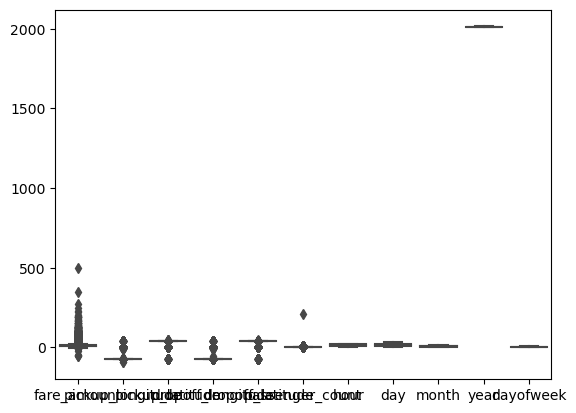

In [20]:
sns.boxplot(data=data)

In [21]:
# Outlier Detection (IQR method)
for column in data.columns:
    Q1 = data[column].quantile(0.25)1`
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

<AxesSubplot:>

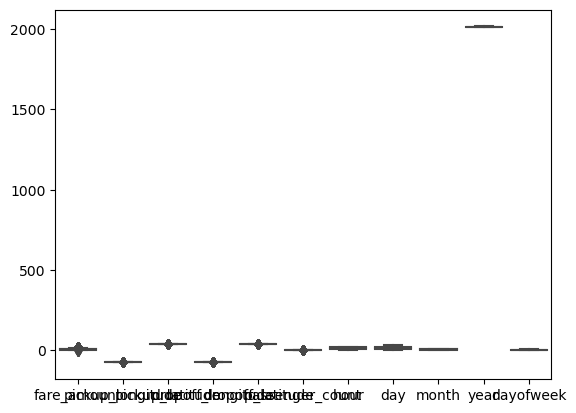

In [22]:
sns.boxplot(data=data)

In [23]:
#check correlation
corr_matrix = data.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
fare_amount,1.000000,-0.052798,-0.076539,-0.023167,-0.094152,0.019572,0.006046,0.007224,0.028798,0.154908,0.012933
pickup_longitude,-0.052798,1.000000,0.693656,0.409016,0.353741,-0.022952,0.013539,-0.004946,-0.002471,-0.002829,-0.034310
pickup_latitude,-0.076539,0.693656,1.000000,0.334680,0.499956,-0.019989,0.034327,-0.001917,0.002275,-0.001225,-0.050805
dropoff_longitude,-0.023167,0.409016,0.334680,1.000000,0.651683,-0.016413,0.000404,-0.010045,-0.004680,0.004697,-0.027932
dropoff_latitude,-0.094152,0.353741,0.499956,0.651683,1.000000,-0.013321,0.026124,-0.006094,-0.000405,0.001876,-0.038742
passenger_count,0.019572,-0.022952,-0.019989,-0.016413,-0.013321,1.000000,0.034175,0.001036,0.007192,-0.022708,0.065425
hour,0.006046,0.013539,0.034327,0.000404,0.026124,0.034175,1.000000,0.003957,-0.003213,0.005443,-0.079647
day,0.007224,-0.004946,-0.001917,-0.010045,-0.006094,0.001036,0.003957,1.000000,-0.018587,-0.009239,0.005335
month,0.028798,-0.002471,0.002275,-0.004680,-0.000405,0.007192,-0.003213,-0.018587,1.000000,-0.114230,-0.009308
year,0.154908,-0.002829,-0.001225,0.004697,0.001876,-0.022708,0.005443,-0.009239,-0.114230,1.000000,0.006506


In [24]:
# Split the data into training and testing sets
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count',	'hour',	'day',	'month',	'year',	'dayofweek',	'distance']]
y = data['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: "['distance'] not in index"

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Evaluate models
lr_r2 = r2_score(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print("Linear Regression Results:")
print(f"R2 Score: {lr_r2}")
print(f"RMSE: {lr_rmse}")

print("\nRandom Forest Regression Results:")
print(f"R2 Score: {rf_r2}")
print(f"RMSE: {rf_rmse}")

Linear Regression Results:
R2 Score: 0.6323872748645532
RMSE: 2.114290736002542

Random Forest Regression Results:
R2 Score: 0.7161176565410075
RMSE: 1.8579697101633048
